In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

price = pd.read_csv('price_demand_data.csv')
weather = pd.read_csv('weather_data.csv')

display(price.head())
print('price.shape is', price.shape)
print(price.dtypes)

display(weather.head())
print('weather.shape is',weather.shape)
print(weather.dtypes)


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


price.shape is (11664, 4)
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
PRICECATEGORY      object
dtype: object


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


weather.shape is (243, 21)
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object


In [2]:
price.index
weather.index
price['PRICECATEGORY'].value_counts()
price['TOTALDEMAND'].describe()
price['REGION'].value_counts()


VIC1    11664
Name: REGION, dtype: int64

In [3]:
simple_weather = weather[['Date','Minimum temperature (°C)','Maximum temperature (°C)','3pm Temperature (°C)']]
display(simple_weather.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),3pm Temperature (°C)
0,1/01/2021,15.6,29.9,28.1
1,2/01/2021,18.4,29.0,28.7
2,3/01/2021,17.0,26.2,23.5
3,4/01/2021,16.0,18.6,18.2
4,5/01/2021,15.9,19.1,18.2


In [4]:
simple_weather['Maximum temperature (°C)'].describe()
simple_weather['Minimum temperature (°C)'].describe()
simple_weather['3pm Temperature (°C)'].describe()

count    243.000000
mean      18.040329
std        4.963547
min        8.600000
25%       14.400000
50%       17.100000
75%       20.150000
max       35.200000
Name: 3pm Temperature (°C), dtype: float64

In [5]:
#Seprating Dates & Time in diffrent coloumn


price['Date'] = pd. to_datetime(price['SETTLEMENTDATE']). dt. date
price['Time'] = pd. to_datetime(price['SETTLEMENTDATE']). dt. time

display(price.head(48))

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
5,VIC1,1/01/2021 3:00,3549.37,LOW,2021-01-01,03:00:00
6,VIC1,1/01/2021 3:30,3504.17,LOW,2021-01-01,03:30:00
7,VIC1,1/01/2021 4:00,3547.90,LOW,2021-01-01,04:00:00
8,VIC1,1/01/2021 4:30,3579.11,LOW,2021-01-01,04:30:00
9,VIC1,1/01/2021 5:00,3580.77,LOW,2021-01-01,05:00:00


In [6]:
#Calculating max TOTALDEMAND per day

simple_price = price.groupby('Date')['TOTALDEMAND'].max()
simple_price = simple_price.reset_index()
display(simple_price.head())

,Date,TOTALDEMAND
0,2021-01-01,5019.64
1,2021-01-02,5228.29
2,2021-01-03,5225.37
3,2021-01-04,5807.02
4,2021-01-05,5261.09


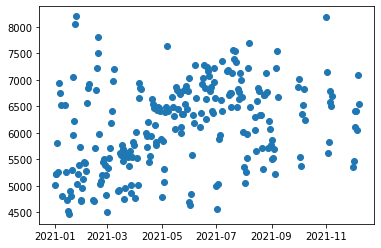

In [7]:
plt.scatter(x = simple_price['Date'], y = simple_price['TOTALDEMAND'])
plt.show()

#print("Pearson r is ",simple_price['Date'].corr(simple_price['TOTALDEMAND']))

In [8]:
FEACHERS = ['Date','TOTALDEMAND']
simple_price[FEACHERS].corr(method = 'pearson')

,TOTALDEMAND
TOTALDEMAND,1.0


In [9]:
final_price = pd.merge(price, simple_price, how = 'inner')
display(final_price.head())

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 17:30,5019.64,LOW,2021-01-01,17:30:00
1,VIC1,2/01/2021 17:00,4964.35,LOW,2021-02-01,17:00:00
2,VIC1,3/01/2021 18:30,4503.31,LOW,2021-03-01,18:30:00
3,VIC1,4/01/2021 18:30,4764.18,LOW,2021-04-01,18:30:00
4,VIC1,5/01/2021 17:00,4800.64,LOW,2021-05-01,17:00:00


In [12]:
all_data = pd.merge(final_price, simple_weather, how = 'outer')
display(all_data.head())

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time,Minimum temperature (°C),Maximum temperature (°C),3pm Temperature (°C)
0,VIC1,1/01/2021 17:30,5019.64,LOW,2021-01-01,17:30:00,NaN,NaN,NaN
1,VIC1,2/01/2021 17:00,4964.35,LOW,2021-02-01,17:00:00,NaN,NaN,NaN
2,VIC1,3/01/2021 18:30,4503.31,LOW,2021-03-01,18:30:00,NaN,NaN,NaN
3,VIC1,4/01/2021 18:30,4764.18,LOW,2021-04-01,18:30:00,NaN,NaN,NaN
4,VIC1,5/01/2021 17:00,4800.64,LOW,2021-05-01,17:00:00,NaN,NaN,NaN
